# UNIVARIATE CASE

## A. Generate 20 real number for the variable X from the uniform distribution U [0,1].

In [244]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [245]:
# uniform distribution of 20 real number
X_train=np.random.uniform(0,1,20)
X_train

array([0.936697  , 0.38882071, 0.55126619, 0.48502689, 0.04096778,
       0.67526525, 0.15099325, 0.91171956, 0.01966934, 0.5144118 ,
       0.16234207, 0.69862964, 0.17651698, 0.87750795, 0.60960529,
       0.34361972, 0.38595435, 0.98561476, 0.21241144, 0.82032701])

## B. Construct the training set T = { ($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{20}$, $y_{20}$)} using the relation :

##$Y_{i}$  = sin(2 π $x_{i}$) + $ε_{i}$ where $ε_{i}$ ~ N(0,0.25)


In [246]:
Y_train =[]

for x_val in X_train:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_train.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_train = pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train'])
df_train = df_train.T
df_train

,X_train,Y_train
0,0.936697,-0.150000
1,0.388821,0.705852
2,0.551266,-0.299145
3,0.485027,0.099074
4,0.040968,0.275144
5,0.675265,-0.647657
6,0.150993,0.942026
7,0.911720,-0.294833
8,0.019669,0.151586
9,0.514412,0.055516


## C. In the similar way construct a testing set of size 50, i.e. Test = { ($x'_{1}$, $y'_{1}$), ($x'_{2}$, $y'_{2}$), ... , ($x'_{50}$, $y'_{50}$)}

In [247]:
X_test = np.random.uniform(0,1,50)
Y_test = []

for i in X_test:
    Yi = math.sin(2 *math.pi*i) + np.random.uniform(0,0.25) 
    Y_test.append(Yi)

# For better understanding, let's convert X and Y testing dataset into a dataframe
df_test = pd.DataFrame(data=(X_test,Y_test),index=['X_test','Y_test'])
df_test = df_test.T
df_test

,X_test,Y_test
0,0.639671,-0.728202
1,0.136985,0.803192
2,0.453860,0.385406
3,0.187140,1.101731
4,0.176944,1.010360
5,0.572406,-0.360636
6,0.160142,0.942880
7,0.854515,-0.700421
8,0.405049,0.811724
9,0.437245,0.489664


## D. Estimate the Regularized Least Squared Polynomial Regression model of order M= 1, 2, 3, 9 using the training set T.


## Example
## 1. For M=1 , we need to estimate F(x) = $β_{1}$x +  $β_{0}$
## 2. For M = 2,  F(x) =  $β_{2}$ $x^{2}$ +  $β_{1}$x +  $β_{0}$

### In the previous assignment, we observed that, as our value of the coefficients increases, this results in the problem  of overfitting. Overfitting occurs when the trained model performs well on the training data and performs poorly on the testing dataset. This can be taken care of by following steps :

### 1. By increasing the training dataset to better train our model.
### 2. Regularization methods that will apply a penalizing term (reducing the weights and biases) to overcome overfitting.


### Let's see how our graph looks like without "Regularization"...

In [304]:
# Find LSPR for M = 1, 2, 3, 9

# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_1 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 1))
LSP_ord_2 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 2))
LSP_ord_3 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 3))
LSP_ord_9 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 9))

In [305]:
# Find the predicted values for M = 1, 2, 3, 9

# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_test['X_test'])
y_predicted_m1 = []
y_predicted_m2 = []
y_predicted_m3 = []
y_predicted_m9 = []

# M = 1
for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += LSP_ord_1[0][deg] * math.pow(val, deg)
  y_predicted_m1.append(y_val)

df_predicted_m1 = pd.DataFrame(data=(X, y_predicted_m1),index=['X', 'Y_predicted']).T

# M = 2
for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += LSP_ord_2[0][deg] * math.pow(val, deg)
  y_predicted_m2.append(y_val)

df_predicted_m2 = pd.DataFrame(data=(X, y_predicted_m2),index=['X', 'Y_predicted']).T

# M = 3
for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += LSP_ord_3[0][deg] * math.pow(val, deg)
  y_predicted_m3.append(y_val)

df_predicted_m3 = pd.DataFrame(data=(X, y_predicted_m3),index=['X', 'Y_predicted']).T

# M = 9
for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += LSP_ord_9[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)

df_predicted_m9 = pd.DataFrame(data=(X, y_predicted_m9),index=['X', 'Y_predicted']).T

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

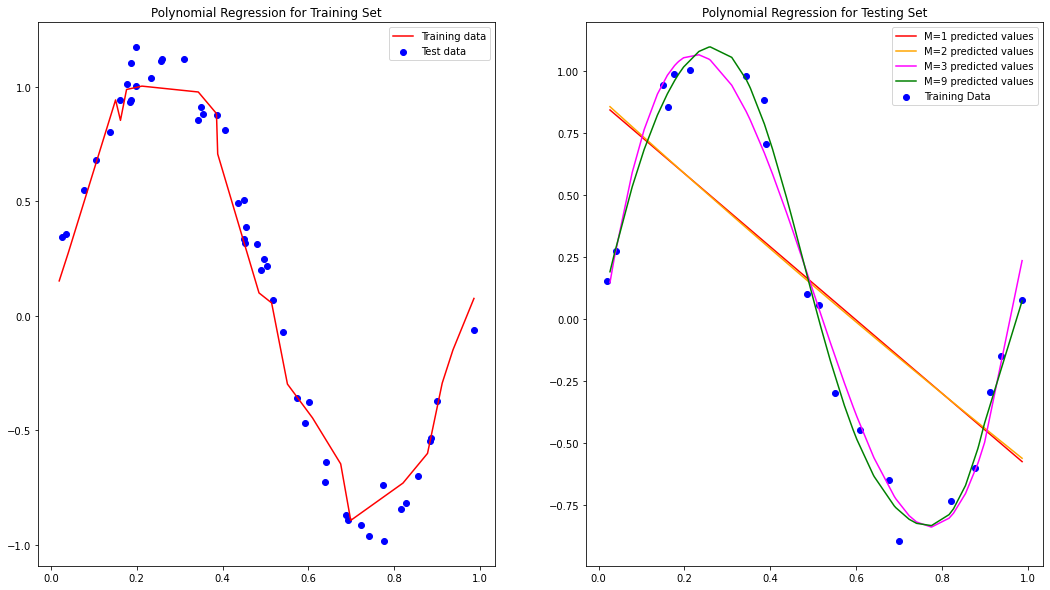

In [306]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m1 = df_predicted_m1.sort_values(by=['X'])
df_pred_sort_m2 = df_predicted_m2.sort_values(by=['X'])
df_pred_sort_m3 = df_predicted_m3.sort_values(by=['X'])
df_pred_sort_m9 = df_predicted_m9.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m1['X'], df_pred_sort_m1['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m2['X'], df_pred_sort_m2['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m3['X'], df_pred_sort_m3['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m9['X'], df_pred_sort_m9['Y_predicted'], color='green')
axes[1].legend(['M=1 predicted values', 'M=2 predicted values', 'M=3 predicted values', 'M=9 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

## On comparing the values of coefficients $β_{1}$, $β_{2}$, $β_{2}$ ... for increasing order of M, we notice that the value of coefficients increases significantly on going from order 3 to order 9.

In [265]:
print(f'The coefficiet for M=1: {LSP_ord_1}\n')
print(f'The coefficiet for M=2: {LSP_ord_2}\n')
print(f'The coefficiet for M=3: {LSP_ord_3}\n')
print(f'The coefficiet for M=9: {LSP_ord_9}\n')

The coefficiet for M=1: [[ 0.88083189 -1.47540645]]

The coefficiet for M=2: [[ 0.89669441 -1.57346223  0.09695464]]

The coefficiet for M=3: [[ -0.14623506  11.95583466 -34.36022473  22.94457941]]

The coefficiet for M=9: [[ 4.54496059e-03  6.67410592e+00  2.30429679e+01 -4.56157183e+02
   2.90447796e+03 -1.03245068e+04  2.08118295e+04 -2.35762582e+04
   1.40231932e+04 -3.41229358e+03]]



## We can avoid overfitting by using so-called ''regularization''. How does it work? Usually, a function is prone to be overfitting when its coefficients (weighting values) has big value and not well distributed. Thus, we will force our training process to make those coefficients small by adding a term in our cost function. This process also makes those coefficients more well distributed. Here is our new cost function.

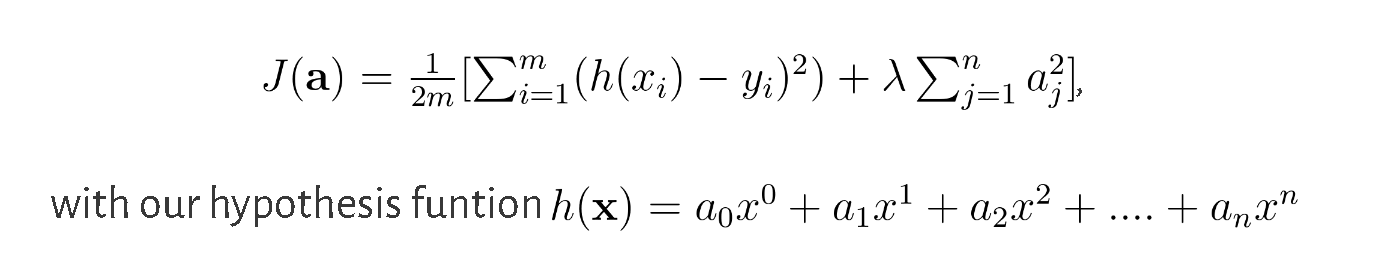

On solving, we get a = [$a_{0}$, $a_{1}$, $a_{2}$, ... , $a_{n}$] as

$({X^{T}} X+λ.I )^{-1}$ . $X^{T}$.y

In [324]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

### For order m=1

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [326]:
reg_LSP_ord_1_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0))
reg_LSP_ord_1_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 1))
reg_LSP_ord_1_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 5))
reg_LSP_ord_1_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_1_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_1_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_1_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_1_10}')

coefficient value with regularization and λ = 0: [[ 0.88083189 -1.47540645]]
coefficient value with regularization and λ = 1: [[ 0.5474593  -0.86016901]]
coefficient value with regularization and λ = 5: [[ 0.24074941 -0.30947955]]
coefficient value with regularization and λ = 10: [[ 0.15277892 -0.16518332]]


#### Obtain the prediction on testing set and compute the RMSE for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [333]:
y_predicted_m1_0, y_predicted_m1_1, y_predicted_m1_5, y_predicted_m1_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_0[0][deg] * math.pow(val, deg)
  y_predicted_m1_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_1[0][deg] * math.pow(val, deg)
  y_predicted_m1_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_5[0][deg] * math.pow(val, deg)
  y_predicted_m1_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_10[0][deg] * math.pow(val, deg)
  y_predicted_m1_10.append(y_val)

df_predicted_m1_0 = pd.DataFrame(data=(X, y_predicted_m1_0),index=['X', 'Y_predicted']).T
df_predicted_m1_1 = pd.DataFrame(data=(X, y_predicted_m1_1),index=['X', 'Y_predicted']).T
df_predicted_m1_5 = pd.DataFrame(data=(X, y_predicted_m1_5),index=['X', 'Y_predicted']).T
df_predicted_m1_10 = pd.DataFrame(data=(X, y_predicted_m1_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

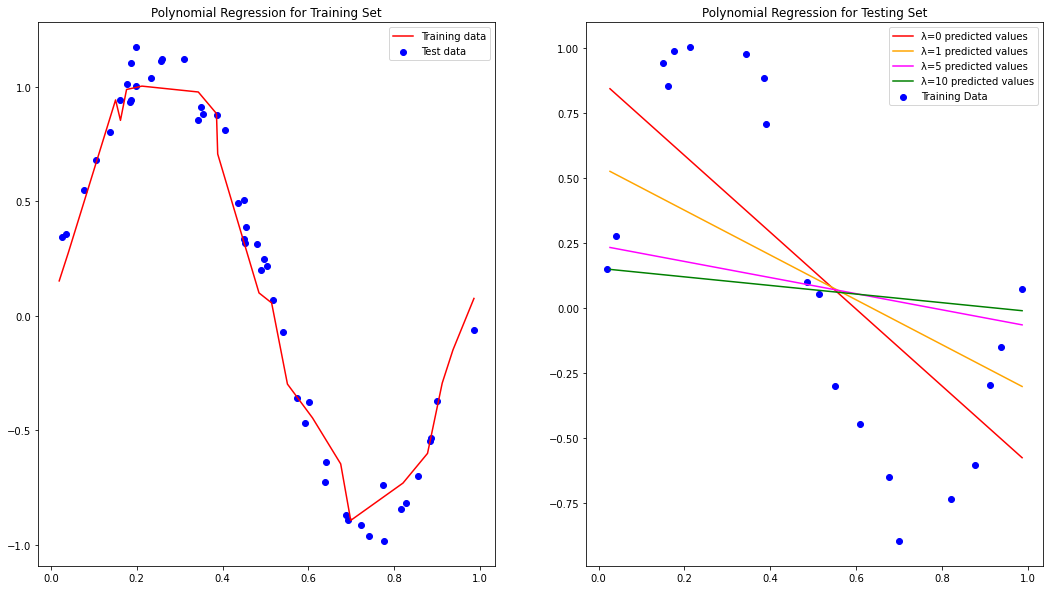

In [348]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m1_0 = df_predicted_m1_0.sort_values(by=['X'])
df_pred_sort_m1_1 = df_predicted_m1_1.sort_values(by=['X'])
df_pred_sort_m1_5 = df_predicted_m1_5.sort_values(by=['X'])
df_pred_sort_m1_10 = df_predicted_m1_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m1_0['X'], df_pred_sort_m1_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m1_1['X'], df_pred_sort_m1_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m1_5['X'], df_pred_sort_m1_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m1_10['X'], df_pred_sort_m1_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

In [318]:
y_vs_y_hat_m1 = pd.DataFrame(data=(y_predicted_m1,Y_test),index=['y_predicted_m1','Y_train']).T
y_vs_y_hat_m1

,y_predicted_m1,Y_train
0,-0.062943,-0.728202
1,0.678723,0.803192
2,0.211203,0.385406
3,0.604724,1.101731
4,0.619768,1.010360
5,0.036301,-0.360636
6,0.644557,0.942880
7,-0.379925,-0.700421
8,0.283219,0.811724
9,0.235718,0.489664


In [321]:
for itr in range(len(y_vs_y_hat_m1)):
  y_vs_y_hat_m1['sum of square error'].iloc[itr] = (y_vs_y_hat_m1['y_predicted_m1'].iloc[itr] - y_vs_y_hat_m1['Y_train'].iloc[itr])**2
y_vs_y_hat_m1

KeyError: ignored

In [ ]:
regularized_m1 =[]
for Lambda in range(1,6):
  result = y_vs_y_hat_m1 + ((Lambda/2) * np.sum(LSP_ord_1**2))
  regularized_m1.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}\n: {regularized_m1[itr]}\n\n')

### For order m=2

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [327]:
reg_LSP_ord_2_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 0))
reg_LSP_ord_2_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 1))
reg_LSP_ord_2_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 5))
reg_LSP_ord_2_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_2_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_2_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_2_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_2_10}')

coefficient value with regularization and λ = 0: [[ 0.89669441 -1.57346223  0.09695464]]
coefficient value with regularization and λ = 1: [[ 0.55372018 -0.51267777 -0.52857999]]
coefficient value with regularization and λ = 5: [[ 0.27826612 -0.22425326 -0.26305907]]
coefficient value with regularization and λ = 10: [[ 0.17684672 -0.13031825 -0.15745722]]


#### Obtain the prediction on testing set and compute the RMSE for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [343]:
y_predicted_m2_0, y_predicted_m2_1, y_predicted_m2_5, y_predicted_m2_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_0[0][deg] * math.pow(val, deg)
  y_predicted_m2_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_1[0][deg] * math.pow(val, deg)
  y_predicted_m2_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_5[0][deg] * math.pow(val, deg)
  y_predicted_m2_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_10[0][deg] * math.pow(val, deg)
  y_predicted_m2_10.append(y_val)

df_predicted_m2_0 = pd.DataFrame(data=(X, y_predicted_m2_0),index=['X', 'Y_predicted']).T
df_predicted_m2_1 = pd.DataFrame(data=(X, y_predicted_m2_1),index=['X', 'Y_predicted']).T
df_predicted_m2_5 = pd.DataFrame(data=(X, y_predicted_m2_5),index=['X', 'Y_predicted']).T
df_predicted_m2_10 = pd.DataFrame(data=(X, y_predicted_m2_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

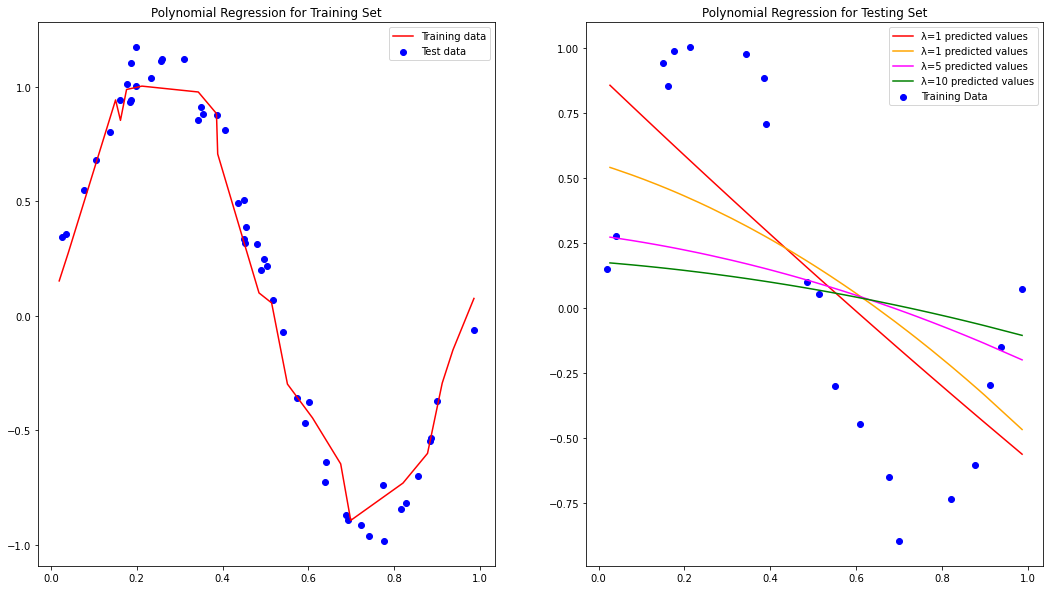

In [344]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m2_0 = df_predicted_m2_0.sort_values(by=['X'])
df_pred_sort_m2_1 = df_predicted_m2_1.sort_values(by=['X'])
df_pred_sort_m2_5 = df_predicted_m2_5.sort_values(by=['X'])
df_pred_sort_m2_10 = df_predicted_m2_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m2_0['X'], df_pred_sort_m2_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m2_1['X'], df_pred_sort_m2_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m2_5['X'], df_pred_sort_m2_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m2_10['X'], df_pred_sort_m2_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

In [335]:
y_vs_y_hat_m2 = pd.DataFrame(data=(y_predicted_m2,Y_test),index=['y_predicted_m2','Y_train']).T

In [256]:
for itr in range(len(y_vs_y_hat_m2)):
  y_vs_y_hat_m2['sum of square error'].iloc[itr] = (y_vs_y_hat_m2['y_predicted_m2'].iloc[itr] - y_vs_y_hat_m2['Y_train'].iloc[itr])**2
y_vs_y_hat_m2

,y_predicted_m2,Y_train,sum of square error
0,-0.070133,-0.728202,0.376109
1,0.682973,0.803192,0.376109
2,0.202534,0.385406,0.376109
3,0.605632,1.101731,0.376109
4,0.621316,1.010360,0.376109
5,0.027803,-0.360636,0.376109
6,0.647203,0.942880,0.376109
7,-0.377057,-0.700421,0.376109
8,0.275271,0.811724,0.376109
9,0.227242,0.489664,0.376109


In [257]:
regular_m2 =[]
for Lambda in range(1,6):
  result = ssr_m2 + ((Lambda/2) * np.sum(LSP_ord_2**2))
  regular_m2.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m2[itr]}\n\n')

RMSE for lambda = 1: [1.88687629 1.71975716 2.05518057 1.8107929  1.78131251 1.66889724
 1.98522854 1.92058012 1.91483196 1.71021273 1.66364644 1.87132978
 1.92075539 1.84157375 1.90144508 1.64653023 1.76880678 1.88305145
 1.74091827 1.70042079 1.93771134 1.79602689 1.95604792 1.88808018
 1.8585619  2.04286306 1.95224801 1.64646507 1.74381555 1.75151266
 1.93979871 1.69883027 1.84265202 1.79959504 1.75075671 1.91177118
 2.11766749 1.68547575 1.77756711 1.70635302 2.4225786  2.22449284
 1.92196403 1.98541041 1.67368232 1.88781737 1.73887867 1.78879822
 1.64477847 1.87038447]


RMSE for lambda = 2: [3.53149851 3.36437938 3.69980279 3.45541513 3.42593474 3.31351947
 3.62985076 3.56520235 3.55945418 3.35483495 3.30826867 3.515952
 3.56537761 3.48619597 3.54606731 3.29115245 3.413429   3.52767367
 3.38554049 3.34504301 3.58233356 3.44064912 3.60067015 3.5327024
 3.50318412 3.68748528 3.59687024 3.2910873  3.38843778 3.39613488
 3.58442094 3.3434525  3.48727424 3.44421726 3.39537893 3.556393

### For order m=3

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [329]:
reg_LSP_ord_3_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 0))
reg_LSP_ord_3_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 1))
reg_LSP_ord_3_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 5))
reg_LSP_ord_3_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_3_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_3_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_3_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_3_10}')

coefficient value with regularization and λ = 0: [[ -0.14623506  11.95583466 -34.36022473  22.94457941]]
coefficient value with regularization and λ = 1: [[ 0.54605039 -0.4522316  -0.43904176 -0.20008652]]
coefficient value with regularization and λ = 5: [[ 0.28931454 -0.18743276 -0.22188307 -0.17602514]]
coefficient value with regularization and λ = 10: [[ 0.18698433 -0.11211781 -0.13868962 -0.11695189]]


#### Obtain the prediction on testing set and compute the RMSE for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [345]:
y_predicted_m3_0, y_predicted_m3_1, y_predicted_m3_5, y_predicted_m3_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_0[0][deg] * math.pow(val, deg)
  y_predicted_m3_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_1[0][deg] * math.pow(val, deg)
  y_predicted_m3_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_5[0][deg] * math.pow(val, deg)
  y_predicted_m3_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_10[0][deg] * math.pow(val, deg)
  y_predicted_m3_10.append(y_val)

df_predicted_m3_0 = pd.DataFrame(data=(X, y_predicted_m3_0),index=['X', 'Y_predicted']).T
df_predicted_m3_1 = pd.DataFrame(data=(X, y_predicted_m3_1),index=['X', 'Y_predicted']).T
df_predicted_m3_5 = pd.DataFrame(data=(X, y_predicted_m3_5),index=['X', 'Y_predicted']).T
df_predicted_m3_10 = pd.DataFrame(data=(X, y_predicted_m3_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

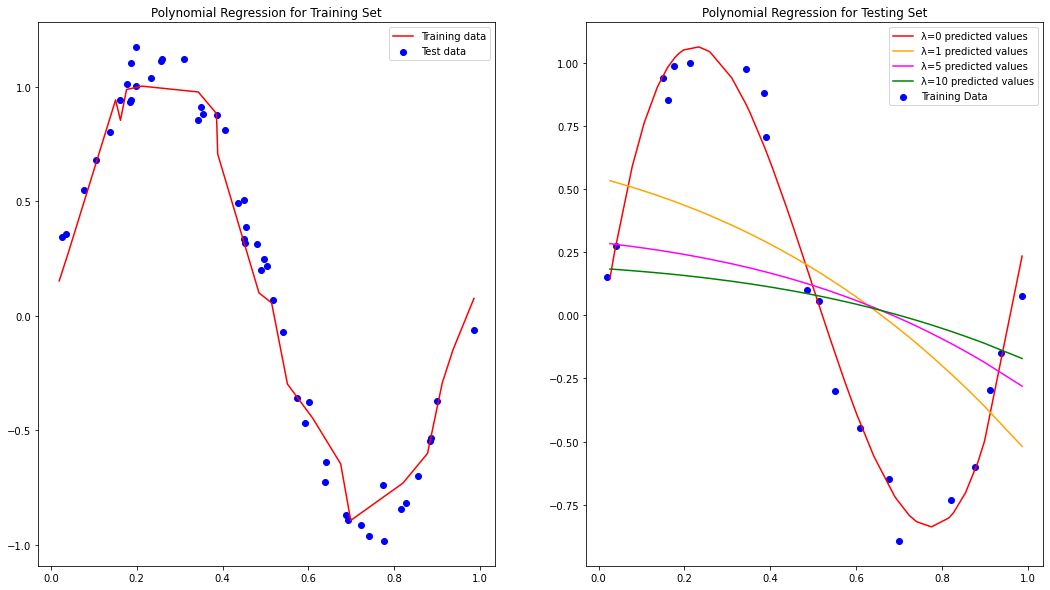

In [347]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m3_0 = df_predicted_m3_0.sort_values(by=['X'])
df_pred_sort_m3_1 = df_predicted_m3_1.sort_values(by=['X'])
df_pred_sort_m3_5 = df_predicted_m3_5.sort_values(by=['X'])
df_pred_sort_m3_10 = df_predicted_m3_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m3_0['X'], df_pred_sort_m3_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m3_1['X'], df_pred_sort_m3_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m3_5['X'], df_pred_sort_m3_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m3_10['X'], df_pred_sort_m3_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

In [258]:
y_vs_y_hat_m3 = pd.DataFrame(data=(y_predicted_m3,Y_test),index=['y_predicted_m3','Y_train']).T

In [259]:
for itr in range(len(y_vs_y_hat_m3)):
  y_vs_y_hat_m3['sum of square error'].iloc[itr] = (y_vs_y_hat_m3['y_predicted_m3'].iloc[itr] - y_vs_y_hat_m1['Y_train'].iloc[itr])**2
y_vs_y_hat_m3

,y_predicted_m3,Y_train,sum of square error
0,-0.552405,-0.728202,0.00432
1,0.905749,0.803192,0.00432
2,0.347305,0.385406,0.00432
3,1.038214,1.101731,0.00432
4,1.020600,1.010360,0.00432
5,-0.257512,-0.360636,0.00432
6,0.981445,0.942880,0.00432
7,-0.702912,-0.700421,0.00432
8,0.583927,0.811724,0.00432
9,0.430322,0.489664,0.00432


In [260]:
regular_m3 =[]
for Lambda in range(1,6):
  result = ssr_m3 + ((Lambda/2) * np.sum(LSP_ord_3**2))
  regular_m3.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m3[itr]}\n\n')

RMSE for lambda = 1: [925.033387   925.02125232 925.07175477 925.02161719 925.0211139
 925.02290684 925.04042546 925.0219444  925.02160301 925.0332172
 925.04597121 925.03713223 925.03507319 925.02148489 925.02784433
 925.02159197 925.02164096 925.03771099 925.02111295 925.02752636
 925.04090646 925.02109932 925.02650491 925.06376376 925.02140107
 925.04054501 925.02428972 925.02178536 925.02365612 925.0655429
 925.03701847 925.02162454 925.02113008 925.04251591 925.0271011
 925.02144671 925.06634879 925.02177644 925.02532453 925.02624386
 925.06357171 925.02962217 925.03378696 925.03447285 925.04853834
 925.02796072 925.02217003 925.02293207 925.0232156  925.0419117 ]


RMSE for lambda = 2: [1850.05445435 1850.04231966 1850.09282211 1850.04268454 1850.04218125
 1850.04397418 1850.06149281 1850.04301175 1850.04267036 1850.05428455
 1850.06703856 1850.05819958 1850.05614054 1850.04255224 1850.04891168
 1850.04265932 1850.04270831 1850.05877834 1850.0421803  1850.04859371
 1850.06197381 

### For order m=9

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [351]:
reg_LSP_ord_9_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0))
reg_LSP_ord_9_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.01))
reg_LSP_ord_9_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.001))
reg_LSP_ord_9_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.0001))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_9_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_9_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_9_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_9_10}')

coefficient value with regularization and λ = 0: [[ 4.54496059e-03  6.67410592e+00  2.30429679e+01 -4.56157183e+02
   2.90447796e+03 -1.03245068e+04  2.08118295e+04 -2.35762582e+04
   1.40231932e+04 -3.41229358e+03]]
coefficient value with regularization and λ = 1: [[ 0.54191565  2.23545821 -4.86072097 -2.75160199 -0.07683051  1.44346195
   1.87083798  1.55295947  0.79296417 -0.19735629]]
coefficient value with regularization and λ = 5: [[  0.14848631   6.60777578 -12.46813326  -4.94373386   2.68414243
    5.88110225   5.46066169   2.84339325  -0.89064462  -5.05792455]]
coefficient value with regularization and λ = 10: [[ -0.01707578   8.59721635 -16.39270979  -5.66220443   4.99002402
    8.24714383   6.2910866    2.16574048  -2.19253158  -5.90089053]]


#### Obtain the prediction on testing set and compute the RMSE for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [352]:
y_predicted_m9_0, y_predicted_m9_1, y_predicted_m9_5, y_predicted_m9_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_0[0][deg] * math.pow(val, deg)
  y_predicted_m9_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_1[0][deg] * math.pow(val, deg)
  y_predicted_m9_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_5[0][deg] * math.pow(val, deg)
  y_predicted_m9_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_10[0][deg] * math.pow(val, deg)
  y_predicted_m9_10.append(y_val)

df_predicted_m9_0 = pd.DataFrame(data=(X, y_predicted_m9_0),index=['X', 'Y_predicted']).T
df_predicted_m9_1 = pd.DataFrame(data=(X, y_predicted_m9_1),index=['X', 'Y_predicted']).T
df_predicted_m9_5 = pd.DataFrame(data=(X, y_predicted_m9_5),index=['X', 'Y_predicted']).T
df_predicted_m9_10 = pd.DataFrame(data=(X, y_predicted_m9_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

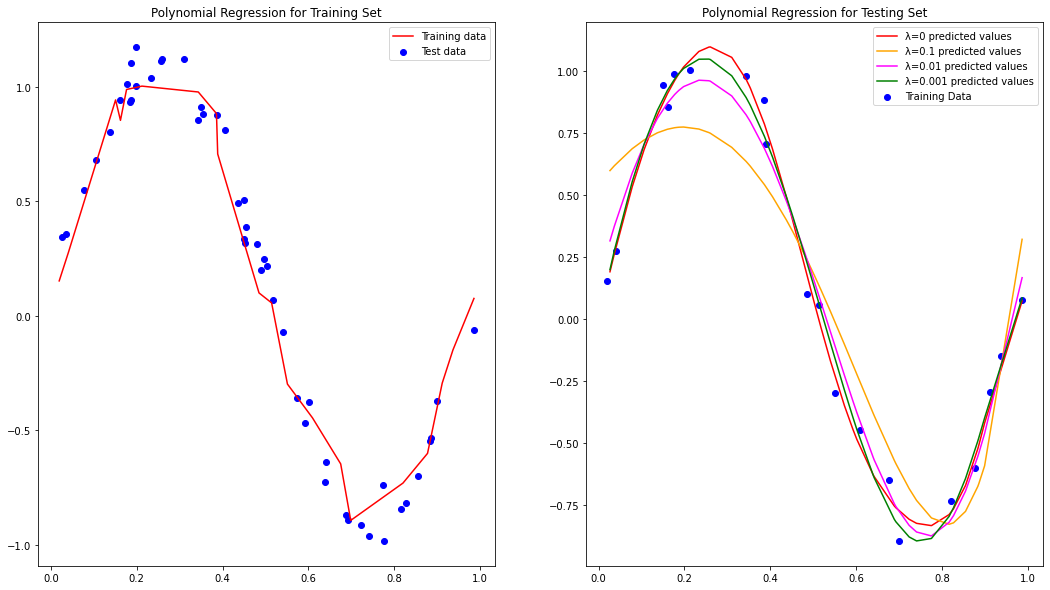

In [354]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m9_0 = df_predicted_m9_0.sort_values(by=['X'])
df_pred_sort_m9_1 = df_predicted_m9_1.sort_values(by=['X'])
df_pred_sort_m9_5 = df_predicted_m9_5.sort_values(by=['X'])
df_pred_sort_m9_10 = df_predicted_m9_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m9_0['X'], df_pred_sort_m9_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m9_1['X'], df_pred_sort_m9_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m9_5['X'], df_pred_sort_m9_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m9_10['X'], df_pred_sort_m9_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=0.1 predicted values', 'λ=0.01 predicted values', 'λ=0.001 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

In [261]:
y_vs_y_hat_m9 = pd.DataFrame(data=(y_predicted_m9, Y_test),index=['y_predicted_m9','Y_train']).T

In [262]:
for itr in range(len(y_vs_y_hat_m9)):
  y_vs_y_hat_m9['sum of square error'].iloc[itr] = (y_vs_y_hat_m9['y_predicted_m9'].iloc[itr] - y_vs_y_hat_m9['Y_train'].iloc[itr])**2
y_vs_y_hat_m9

,y_predicted_m9,Y_train,sum of square error
0,-0.627768,-0.728202,0.000316
1,0.821219,0.803192,0.000316
2,0.384657,0.385406,0.000316
3,0.988073,1.101731,0.000316
4,0.959800,1.010360,0.000316
5,-0.348348,-0.360636,0.000316
6,0.906905,0.942880,0.000316
7,-0.670404,-0.700421,0.000316
8,0.684395,0.811724,0.000316
9,0.491476,0.489664,0.000316


In [263]:
regular_m9 =[]
for Lambda in range(1,6):
  result = ssr_m9 + ((Lambda/2) * np.sum(LSP_ord_9**2))
  regular_m9.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m9[itr]}\n\n')

RMSE for lambda = 1: [6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08
 6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08
 6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08
 6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08 6.5625299e+08]


RMSE for lambda = 2: [1.31250598e+09 1.31250598e+09 1.31250598e+09 1.31250598e+09
 1.31250598e+09 1.31250598e+09 1.31250598e+09 1.31250598e+09
 1.31250598e+09 1.31250598e+09 1.31250598e+09 1.31250598e+09
 1.31250598e+09 1.31250598e+09 1.31250598e+09 1.31250598e+09
 1.31250598e+09 1.31250598e+09 1.31250598e+09 1.31250598e+09]


RMSE for lambda = 3: [1.96875897e+09 1.96875897e+09 1.96875897e+09 1.96875897e+09
 1.96875897e+09 1.96875897e+09 1.96875897e+09 1.96875897e+09
 1.96875897e+09 1.96875897e+09 1.96875897e+09 1.96875897e+09
 1.96875897e+09 1.96875897e+09 1.96875897e+09 1.96875897e+09
 1.96875897e+09 1.96875897e+09 1.96875897e+09 1.96875897e+09]


RMSE for lambda = 4: [2.62501196e+